In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = 'C:/playdata/To_raise_a_child_well/data/dohee/'
sum_df = pd.read_excel(path+'전국데이터프레임2006_2021.xlsx', index_col = 0)

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 분리
from sklearn.model_selection import GridSearchCV, train_test_split
x = sum_df.drop(['출산아수/가임기여성의수'], axis = 1).loc['2006-01-01' : '2021-12-01'].values
y = sum_df['출산아수/가임기여성의수'].loc['2006-01-01' : '2021-12-01']
            
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
final_x_test = 

# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [3]:
# 데이터 프레임
knn_reg_df = pd.DataFrame(index = ['mse', 'rmse', 'r2'])
dt_reg_df = pd.DataFrame(index = ['mse', 'rmse', 'r2'])
rf_reg_df = pd.DataFrame(index = ['mse', 'rmse', 'r2'])

# 객체 형성
knn_reg = KNeighborsRegressor()
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()
        
# 파라미터 설정
params_knn = {'n_neighbors': [2, 3, 4, 5]}
params_dt = {'max_depth': [2, 3, 4, 5]}
params_rf = {'max_depth': [2, 3, 4, 5], 'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

# knn그리드서치
grid_search_knn = GridSearchCV(knn_reg, param_grid = params_knn, cv=5)
grid_search_knn.fit(x_train_scaled, y_train)
# 출력
print("Best hyperparameters: ", grid_search_knn.best_params_)
print("Best score: ", grid_search_knn.best_score_)
# 제일 좋은 것으로 다시돌리기
best_knn = KNeighborsRegressor(n_neighbors = grid_search_knn.best_params_['n_neighbors'])
best_knn.fit(x_train_scaled, y_train)
# 평가하기 
print('KNeighborsRegressor')
train_score = best_knn.score(x_train_scaled, y_train)
print("Train set score: ", train_score)
test_score = best_knn.score(x_test_scaled, y_test)
print("Test set score: ", test_score)
print('------------')

#--------------------

# dt그리드서치
grid_search_dt = GridSearchCV(dt_reg, param_grid = params_dt, cv=5)
grid_search_dt.fit(x_train_scaled, y_train)
# 출력
print("Best hyperparameters: ", grid_search_dt.best_params_)
print("Best score: ", grid_search_dt.best_score_)
# 제일 좋은 것으로 다시돌리기
best_dt = DecisionTreeRegressor(max_depth = grid_search_dt.best_params_['max_depth'])
best_dt.fit(x_train_scaled, y_train)
# 평가하기 
print('DecisionTreeRegressor')
train_score = best_dt.score(x_train_scaled, y_train)
print("Train set score: ", train_score)
test_score = best_dt.score(x_test_scaled, y_test)
print("Test set score: ", test_score)
print('------------')


# rf그리드서치
grid_search_rf = GridSearchCV(rf_reg, param_grid = params_rf, cv=5)
grid_search_rf.fit(x_train_scaled, y_train)
# 출력
print("Best hyperparameters: ", grid_search_rf.best_params_)
print("Best score: ", grid_search_rf.best_score_)
# 제일 좋은 것으로 다시돌리기
best_rf = RandomForestRegressor(max_depth = grid_search_rf.best_params_['max_depth'], 
                               n_estimators = grid_search_rf.best_params_['n_estimators'])
best_rf.fit(x_train_scaled, y_train)
# 평가하기 
print('RandomForestRegressor')
train_score = best_rf.score(x_train_scaled, y_train)
print("Train set score: ", train_score)
test_score = best_rf.score(x_test_scaled, y_test)
print("Test set score: ", test_score)
print('------------')

Best hyperparameters:  {'n_neighbors': 3}
Best score:  0.8274774302412069
KNeighborsRegressor
Train set score:  0.932744540422489
Test set score:  0.9146631697032939
------------
Best hyperparameters:  {'max_depth': 5}
Best score:  0.881970810944375
DecisionTreeRegressor
Train set score:  0.9535869931621328
Test set score:  0.8599581227297266
------------
Best hyperparameters:  {'max_depth': 5, 'n_estimators': 60}
Best score:  0.9072760502834608
RandomForestRegressor
Train set score:  0.9605606563275919
Test set score:  0.9333657155096886
------------


In [6]:
best_rf.feature_importances_

array([0.00613982, 0.01261854, 0.21190076, 0.01958023, 0.11064927,
       0.03982911, 0.06061213, 0.50872006, 0.02041271, 0.00953738])

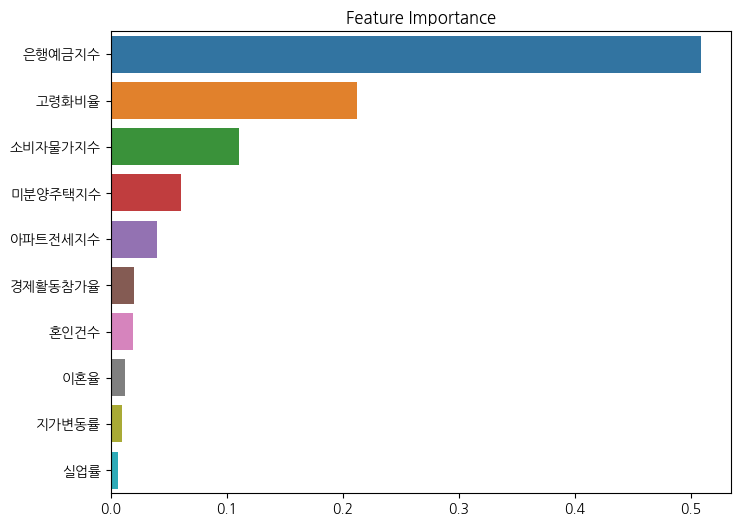

In [8]:
# 특성 중요도
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib as mpl
# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_imt = pd.Series(best_rf.feature_importances_, index = sum_df.drop(['출산아수/가임기여성의수'], axis = 1).columns).sort_values(ascending=False)

mpl.rc('font', family='NanumGothic', size = 10)
plt.figure(figsize=(8,6))
plt.title('Feature Importance')
sns.barplot(x = ft_imt, y = ft_imt.index)
plt.show()

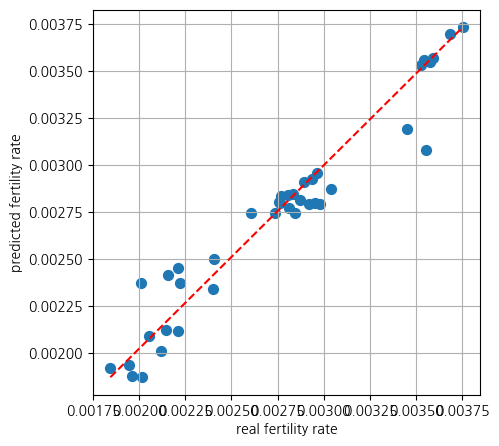

In [18]:
# y_test와 y_pred 시각화

# 실제값 vs 예측값
best_rf_y_pred = best_rf.predict(x_test_scaled)
plt.figure(figsize = (5, 5))

# 실제 데이터 값 선 그려주기
plt.plot([min(y_test), max(y_test)], [min(best_rf_y_pred), max(best_rf_y_pred)], ls = '--', c = 'red')
plt.scatter(y_test, best_rf_y_pred, s = 50) # 점 사이즈 : 50
plt.xlabel('real fertility rate')
plt.ylabel('predicted fertility rate')
plt.grid() 


In [19]:
best_rf_y_pred

array([0.00283971, 0.00233851, 0.00278967, 0.00237235, 0.00280203,
       0.00191845, 0.00357074, 0.00355652, 0.00354534, 0.00369429,
       0.00287362, 0.00284331, 0.00281141, 0.00279572, 0.00212017,
       0.00276956, 0.00245193, 0.00291098, 0.0027951 , 0.00292578,
       0.00193739, 0.00209125, 0.00274362, 0.00278949, 0.00295405,
       0.00274531, 0.00319323, 0.0021162 , 0.00307866, 0.0023696 ,
       0.00274277, 0.00187794, 0.00353361, 0.00283432, 0.00187001,
       0.00373229, 0.00249779, 0.00241484, 0.00201062])

In [20]:
y_test

시점
2009-10-01    0.002808
2017-05-01    0.002401
2012-05-01    0.002981
2017-12-01    0.002009
2015-06-01    0.002756
2020-10-01    0.001845
2007-04-01    0.003589
2007-07-01    0.003542
2007-05-01    0.003573
2006-10-01    0.003685
2012-07-01    0.003040
2015-05-01    0.002834
2011-07-01    0.002872
2011-06-01    0.002764
2018-10-01    0.002147
2008-07-01    0.002810
2018-02-01    0.002211
2011-10-01    0.002891
2015-04-01    0.002951
2011-09-01    0.002935
2020-04-01    0.001945
2018-11-01    0.002055
2015-11-01    0.002605
2014-03-01    0.002918
2011-08-01    0.002964
2015-08-01    0.002735
2008-01-01    0.003448
2019-03-01    0.002213
2011-01-01    0.003554
2017-10-01    0.002219
2015-07-01    0.002842
2019-11-01    0.001964
2007-08-01    0.003527
2013-07-01    0.002767
2020-03-01    0.002017
2006-06-01    0.003751
2017-02-01    0.002407
2017-11-01    0.002159
2019-10-01    0.002117
Name: 출산아수/가임기여성의수, dtype: float64